# Задание 2.4

## Практика

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [2]:
boston = pd.read_csv('files/boston.csv')[['LSTAT', 'MEDV']]
boston.shape

(506, 2)

array([[<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>]], dtype=object)

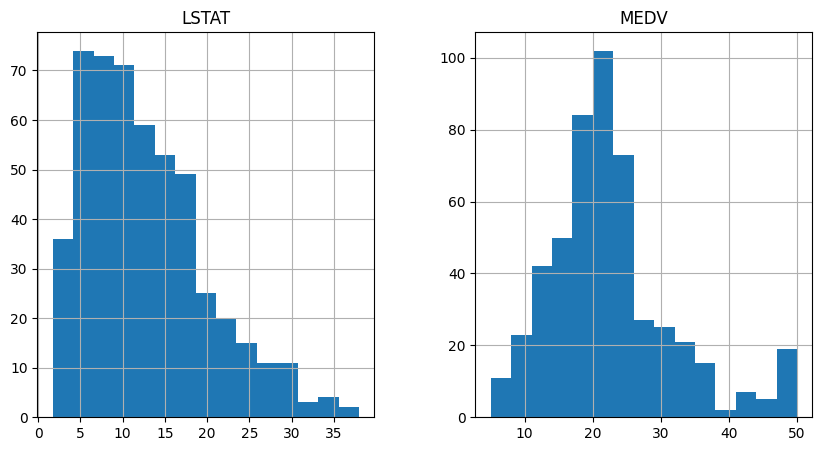

In [3]:
boston.hist(bins = 15, figsize = (10, 5))

In [4]:
boston.describe()

,LSTAT,MEDV
count,506.000000,506.000000
mean,12.653063,22.532806
std,7.141062,9.197104
min,1.730000,5.000000
25%,6.950000,17.025000
50%,11.360000,21.200000
75%,16.955000,25.000000
max,37.970000,50.000000


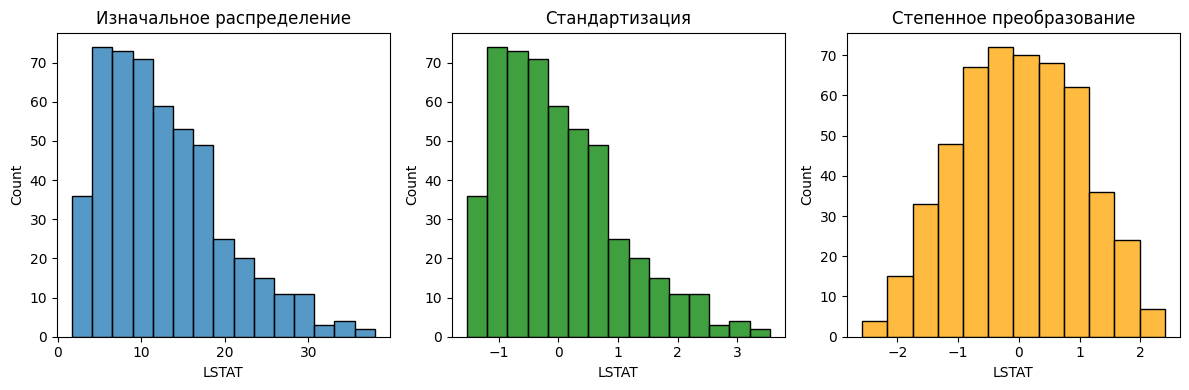

In [5]:
# создадим сетку подграфиков 1 x 3
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (12,4))

# на первом графике разместим изначальное распределение
sns.histplot(data = boston, x = 'LSTAT',
						bins = 15,
						ax = ax[0])
ax[0].set_title('Изначальное распределение')

# на втором - данные после стандартизации
sns.histplot(x = (boston.LSTAT - np.mean(boston.LSTAT)) / np.std(boston.LSTAT),
							bins = 15, color = 'green',
							ax = ax[1])
ax[1].set_title('Стандартизация')

# наконец скачаем функцию степенного преобразования power_transform()
from sklearn.preprocessing import power_transform

# и на третьем графике покажем преобразование Бокса-Кокса
sns.histplot(x = power_transform(boston[['LSTAT']],
																	method = 'box-cox').flatten(),
																	bins = 12, color = 'orange',
																	ax = ax[2])
ax[2].set(title = 'Степенное преобразование', xlabel = 'LSTAT')

plt.tight_layout()
plt.show()

In [6]:
# сделаем копию датафрейма
boston_outlier = boston.copy()
# создадим два отличающихся наблюдения
outliers = [pd.Series([45, 70], index = boston_outlier.columns), pd.Series([50, 72], index = boston_outlier.columns)]
# добавим их в датафрейм
boston_outlier = pd.concat([boston_outlier, pd.DataFrame(outliers)], ignore_index=True)
# посмотрим на размерность нового датафрейма
boston_outlier.shape

(508, 2)

In [7]:
boston_outlier.tail()

,LSTAT,MEDV
503,5.64,23.9
504,6.48,22.0
505,7.88,11.9
506,45.00,70.0
507,50.00,72.0


In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12,6))



## Самостоятельная

Оптимальное λ: 0.50


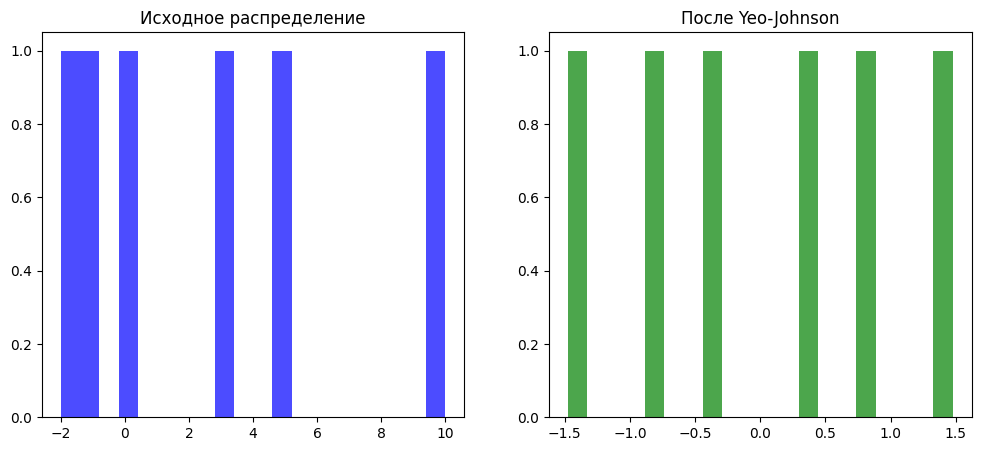

In [2]:
from sklearn.preprocessing import PowerTransformer
import numpy as np
import pandas as pd

# Пример данных с нулями и отрицательными значениями
data = pd.DataFrame({'feature': [0, -1, 5, 10, -2, 3]})

# Применение Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson')
transformed_data = pt.fit_transform(data[['feature']])

# Оптимальное λ
lambda_opt = pt.lambdas_[0]
print(f"Оптимальное λ: {lambda_opt:.2f}")

# Визуализация
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(data['feature'], bins=20, color='blue', alpha=0.7)
plt.title('Исходное распределение')
plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=20, color='green', alpha=0.7)
plt.title('После Yeo-Johnson')
plt.show()

e:\HomeWork\TANN-notebooks\.venv\Lib\site-packages\sklearn\preprocessing\_data.py:2846: UserWarning: n_quantiles (1000) is greater than the total number of samples (502). n_quantiles is set to n_samples.
  warnings.warn(


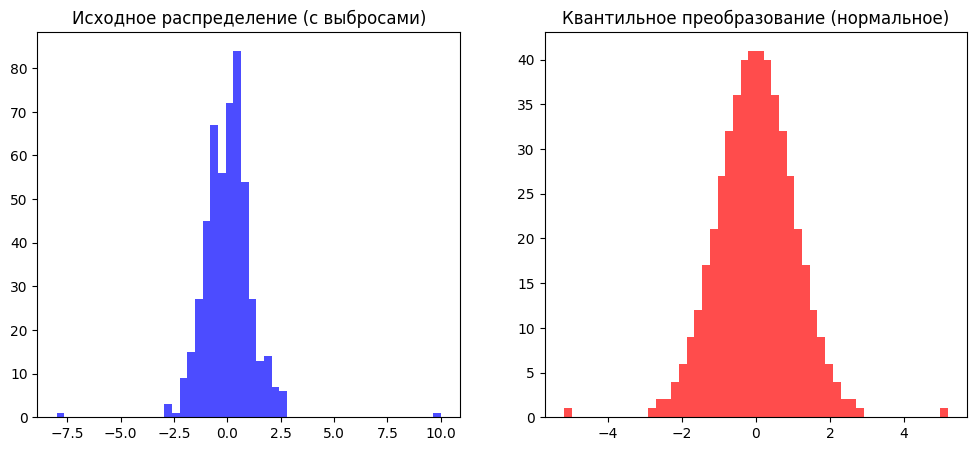

In [3]:
from sklearn.preprocessing import QuantileTransformer

# Пример данных с выбросами
data = pd.DataFrame({'feature': np.concatenate([np.random.normal(0, 1, 500), np.array([10, -8])])})

# Применение квантильного преобразования к нормальному распределению
qt = QuantileTransformer(output_distribution='normal')
transformed_data = qt.fit_transform(data[['feature']])

# Визуализация
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(data['feature'], bins=50, color='blue', alpha=0.7)
plt.title('Исходное распределение (с выбросами)')
plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=50, color='red', alpha=0.7)
plt.title('Квантильное преобразование (нормальное)')
plt.show()